<a href="https://colab.research.google.com/github/i-ninte/data-analytics-R-python/blob/main/HR_ANALYTICS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasks to perform:
Data Cleaning:

Deleting redundant columns.

Renaming the columns.

Dropping duplicates.

Cleaning individual columns.

Remove the NaN values from the dataset

Check for some more Transformations

Data Visualization:

        Plot a correlation map for all numeric variables

        Overtime

        Marital Status

        Job Role

        Gender


        Education Field

        Department

        Business Travel

        Relation between Overtime and Age

        Total Working Years

        Education Level

        Number of Companies Worked

        Distance from Home

Reading thre dataset

In [ ]:
#reading the file
import pandas as pd
hr = pd.read_csv("hr.csv")

# viewing the dataset
print(hr.head())
# viewing the number of records
print(hr.shape)





   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
# viewing the data types
print(hr.dtypes)
#retieving column names
print(hr.columns.values)



Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
duplicated= hr[hr.duplicated()]
print(duplicated)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [ ]:
print(hr.isnull())

        Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                False      False           False          False   
2              

In [ ]:
print(hr.shape)

(1470, 35)


In [ ]:
print(hr.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [ ]:
#dropping redundant columns
hr.drop(['EmployeeCount', 'Over18', 'EmployeeNumber','StandardHours','HourlyRate'], axis=1, inplace=True)

In [ ]:
#dropping duplicates
hr.drop_duplicates(inplace=True)

objectives
to determine the distribution of the workplace based on the gender
the jobsatisfaction according to the jobrole
how the columns affect attrition (age, department, distancefromhome,education, gender, maritalstatus, performancerating,overtime, )
businesstravel and how it it affects
how distancefromhome affects jobsatisfaction, performancerating, monthlyincome, overtime, trainingtimeslastyear,


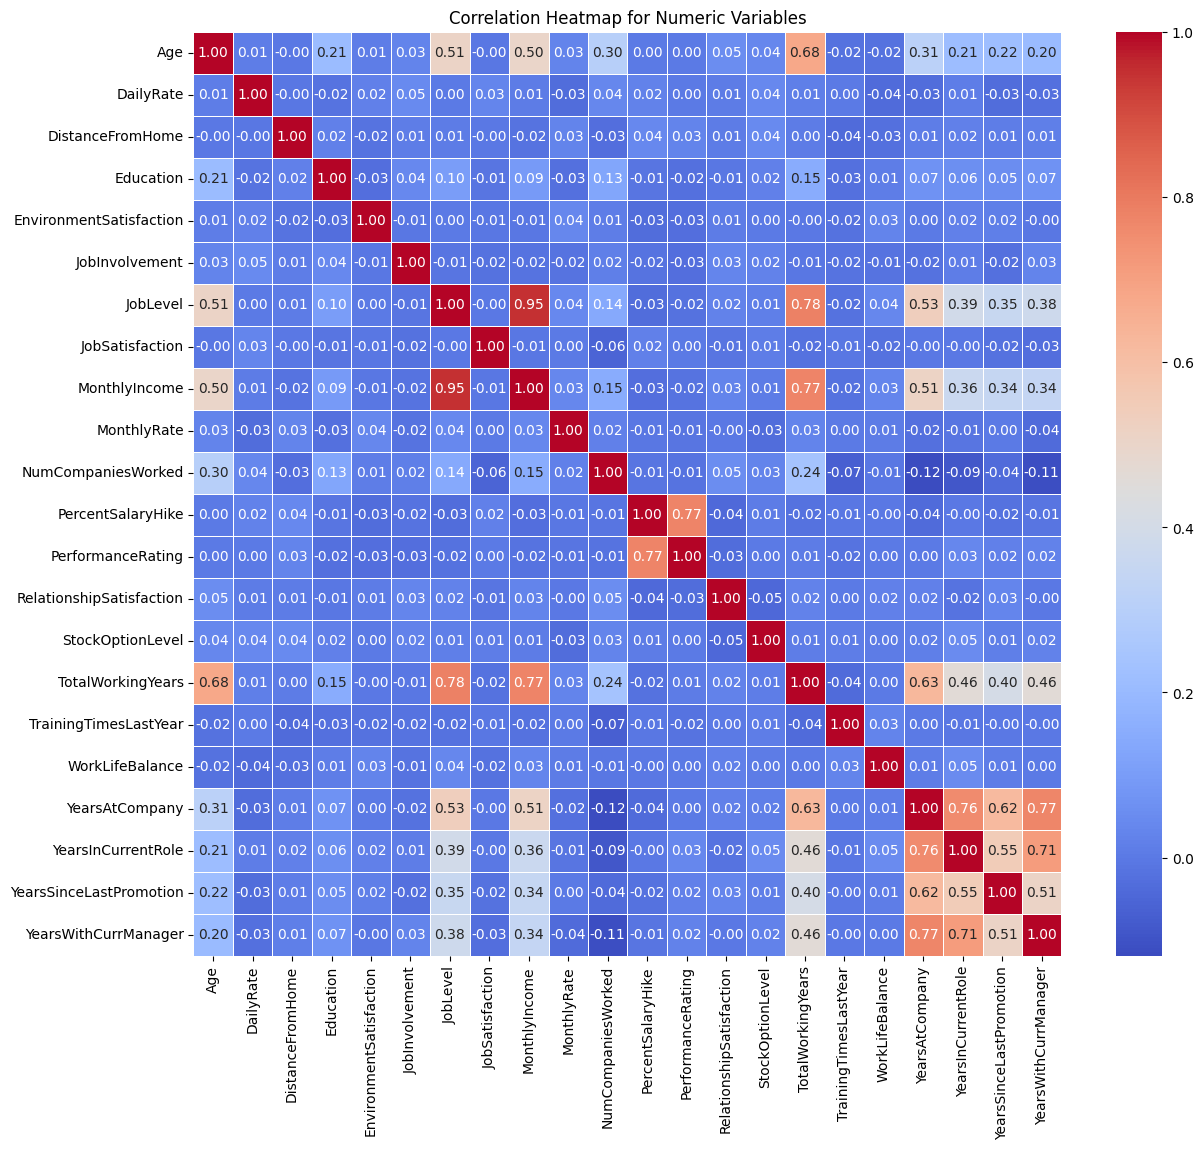

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = hr.select_dtypes(include='number')


correlation_matrix = numeric_cols.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()


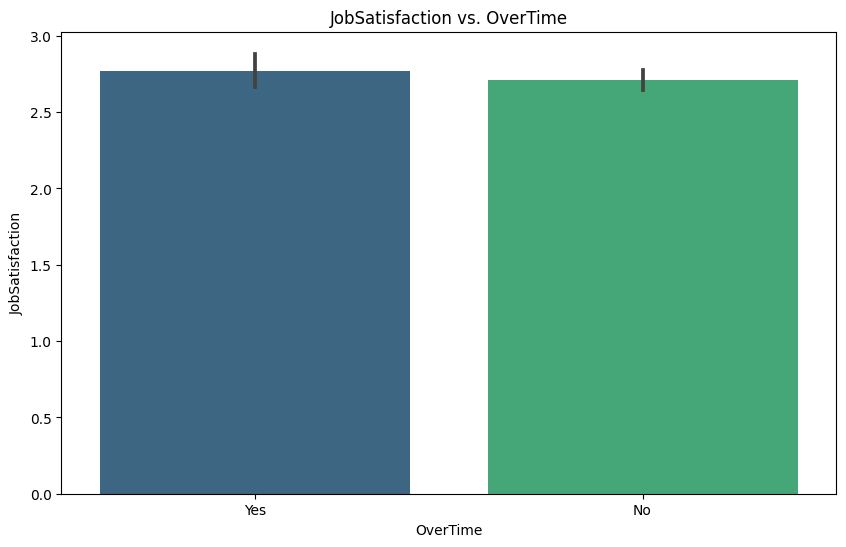

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='OverTime', y='JobSatisfaction', data=hr, palette='viridis')
plt.xlabel('OverTime')
plt.ylabel('JobSatisfaction')
plt.title('JobSatisfaction vs. OverTime')
plt.show()


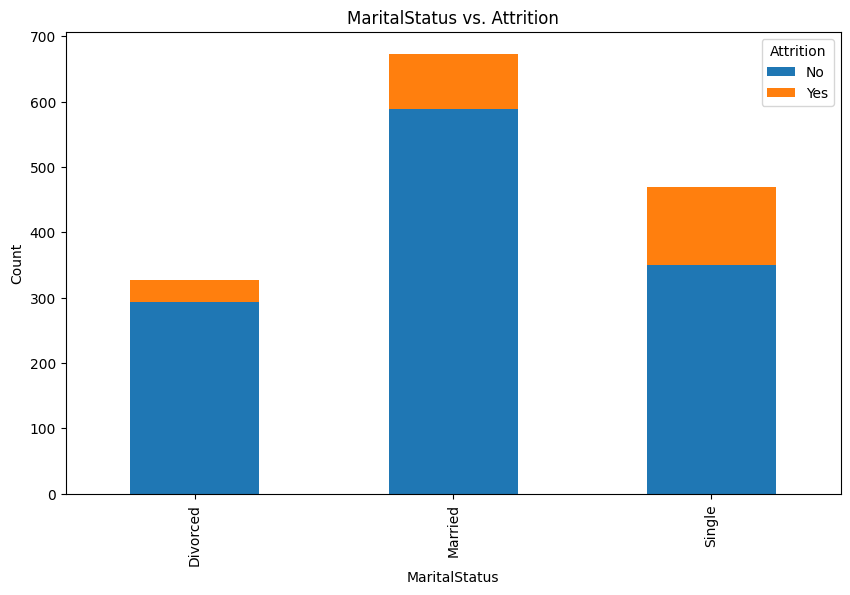

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


marital_attrition_counts = hr.groupby(['MaritalStatus', 'Attrition']).size().unstack()

# Create a bar chart
marital_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('MaritalStatus vs. Attrition')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()


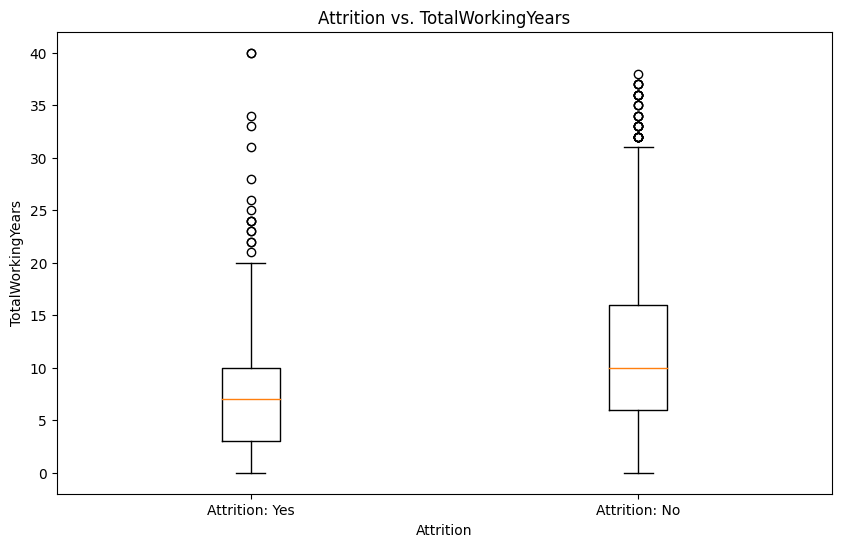

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
plt.boxplot([hr[hr['Attrition'] == 'Yes']['TotalWorkingYears'], hr[hr['Attrition'] == 'No']['TotalWorkingYears']], labels=['Attrition: Yes', 'Attrition: No'])
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.title('Attrition vs. TotalWorkingYears')
plt.show()


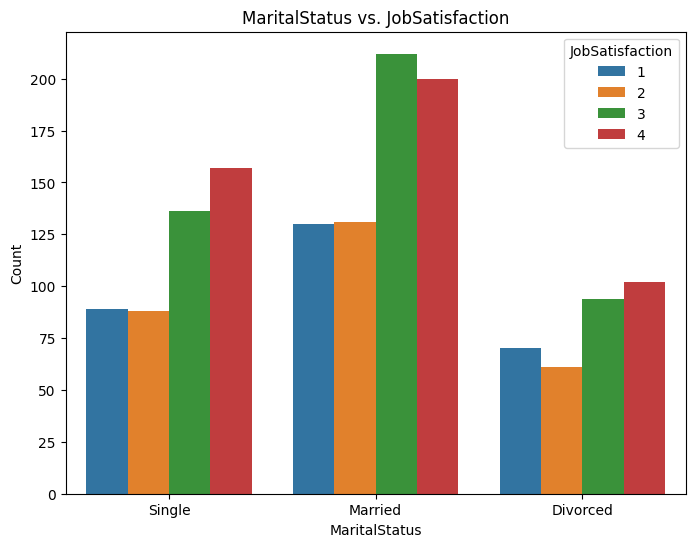

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', hue='JobSatisfaction', data=hr)
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('MaritalStatus vs. JobSatisfaction')
plt.legend(title='JobSatisfaction')
plt.show()
